In [68]:
from PIL import Image, ImageOps
from matplotlib import pyplot as plt

a = Image.open('./img/makima.jpg')
b = Image.open('./img/ojisan_white_bg.jpg')
c = ImageOps.mirror(a)

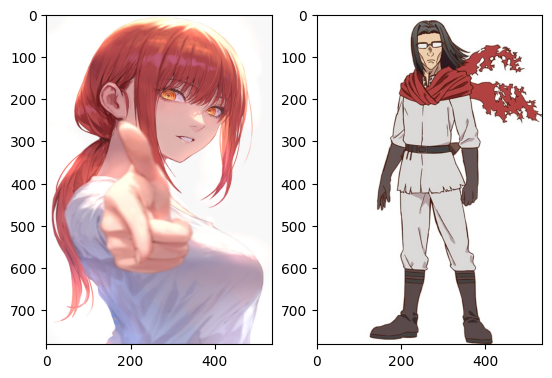

In [69]:
if(a.size < b.size):
    w,h = a.size
else:
    w,h = b.size

plt.subplot(121)
plt.imshow(a.resize((w,h)))
plt.subplot(122)
plt.imshow(b.resize((w,h))) 

a = a.resize((w,h))
b = b.resize((w,h))

# Using 0-1 as indicator (same val = 1, if not = 0)

In [72]:
score = 0
fullscore = h*w
for x in range(w):
    for y in range(h):
        if a.getpixel((x,y)) == b.getpixel((x,y)):
            score+=1

print('score = ',score/fullscore*100,'%')


score =  2.942371584960681 %


# Using differential as indicator

In [73]:
b=c
score = 0
fullscore = w*h
for x in range(w):
    for y in range(h):
        av = list(a.getpixel((x,y)))
        bv = list(b.getpixel((x,y)))
        score += (765 - abs(av[0]-bv[0]) - abs(av[1]-bv[1]) - abs(av[2]-bv[2])) / 765

print('score = ',score/fullscore*100,'%')

score =  75.65920087309853 %


# Use 0-1 indicator, but with threshold

In [ ]:
score = 0
threshold = 150
fullscore = h*w
for x in range(w):
    for y in range(h):
        av = list(a.getpixel((x,y)))
        bv = list(b.getpixel((x,y)))
        diff = (765 - abs(av[0]-bv[0]) - abs(av[1]-bv[1]) - abs(av[2]-bv[2]))
        if(diff <= threshold):
            score+=1

print('score = ',score/fullscore*100,'%')
